### Using facebook prophet for avacado future price prediction

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from fbprophet import Prophet

### Avocado Price Dataset "https://www.kaggle.com/neuromusic/avocado-prices"

In [7]:
data=pd.read_csv('avocado.csv')
data.head()  
# 4046: Total sold numbers of avocados with Product Lookup Code 4046
# 4225: Total sold numbers of avocados with Product Lookup Code 4225
# 4770: Total sold numbers of avocados with Product Lookup Code 4770

Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns]

In [8]:
data.shape

(18249, 14)

In [11]:
# sort date
df=data.iloc[:,1:].sort_values('Date')
df

Date  AveragePrice  ...  year              region
11569  2015-01-04          1.75  ...  2015           Southeast
9593   2015-01-04          1.49  ...  2015             Chicago
10009  2015-01-04          1.68  ...  2015  HarrisburgScranton
1819   2015-01-04          1.52  ...  2015          Pittsburgh
9333   2015-01-04          1.64  ...  2015               Boise
...           ...           ...  ...   ...                 ...
8574   2018-03-25          1.36  ...  2018             Chicago
9018   2018-03-25          0.70  ...  2018        SouthCentral
18141  2018-03-25          1.42  ...  2018        SouthCentral
17673  2018-03-25          1.70  ...  2018          California
8814   2018-03-25          1.34  ...  2018             NewYork

[18249 rows x 13 columns]

In [12]:
data['region'].nunique()  # 54 unique regions

54

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

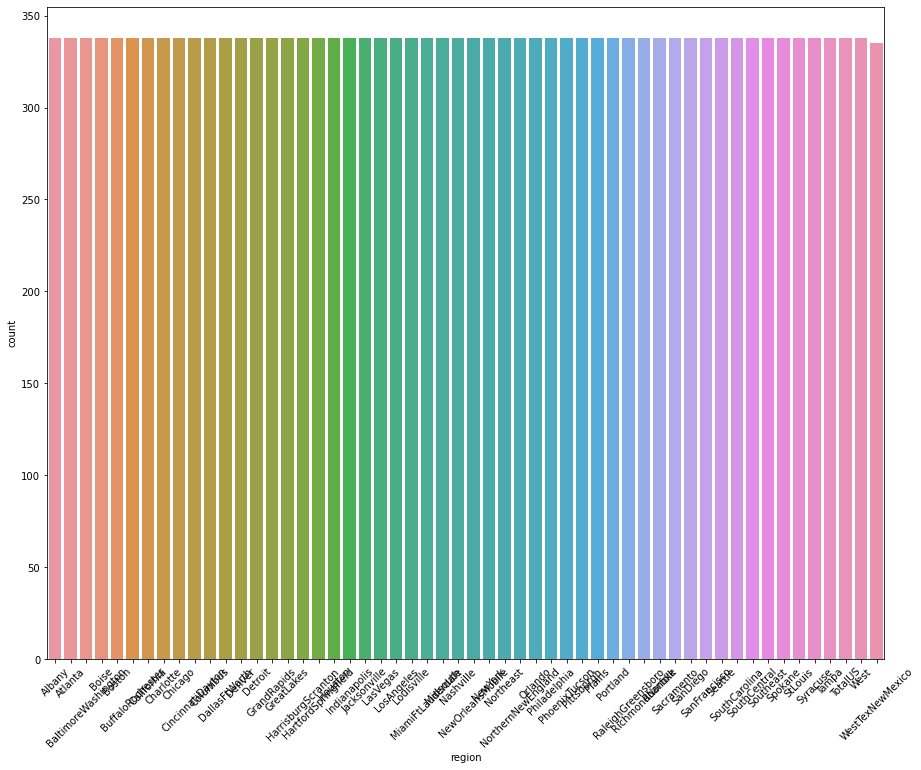

In [15]:
# data distributions among 54 regions pretty even
plt.figure(figsize=(15,12))
sns.countplot(x=data['region'])
plt.xticks(rotation=45)

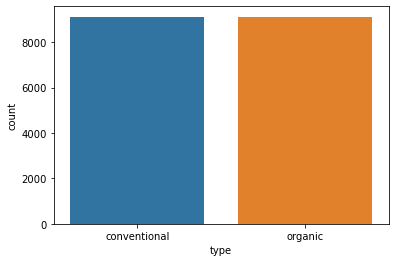

In [44]:
sns.countplot(data['type'])

Text(0.5, 1.0, 'avaocado price data for different years')

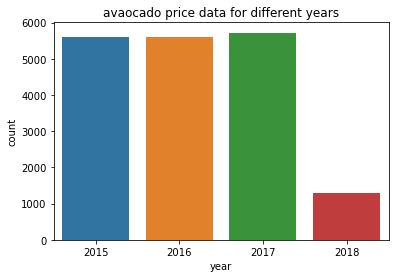

In [18]:
# data distributions among different years
sns.countplot(data['year'])
plt.title('avaocado price data for different years')

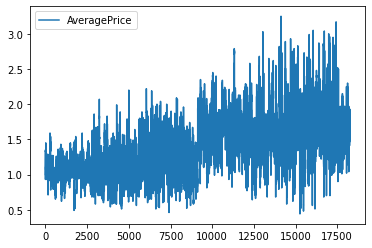

In [20]:
# Predict future avacado average price (not including region or other categories into considerations)
df=data[['Date', 'AveragePrice']] 
df.plot()

In [23]:
# rename the columnes to Prophet required column names
df.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
df

ds     y
0      2015-12-27  1.33
1      2015-12-20  1.35
2      2015-12-13  0.93
3      2015-12-06  1.08
4      2015-11-29  1.28
...           ...   ...
18244  2018-02-04  1.63
18245  2018-01-28  1.71
18246  2018-01-21  1.87
18247  2018-01-14  1.93
18248  2018-01-07  1.62

[18249 rows x 2 columns]

In [25]:
pro=Prophet()
pro.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
# Predict the next 180 days price 
future=pro.make_future_dataframe(periods=180)
future_price=pro.predict(future)

In [27]:
future_price

ds     trend  ...  multiplicative_terms_upper      yhat
0   2015-01-04  1.500084  ...                         0.0  1.385448
1   2015-01-11  1.494831  ...                         0.0  1.388499
2   2015-01-18  1.489578  ...                         0.0  1.383504
3   2015-01-25  1.484325  ...                         0.0  1.359260
4   2015-02-01  1.479072  ...                         0.0  1.325615
..         ...       ...  ...                         ...       ...
344 2018-09-17  1.304307  ...                         0.0  1.476825
345 2018-09-18  1.303600  ...                         0.0  1.480082
346 2018-09-19  1.302893  ...                         0.0  1.483344
347 2018-09-20  1.302186  ...                         0.0  1.486546
348 2018-09-21  1.301478  ...                         0.0  1.489622

[349 rows x 16 columns]

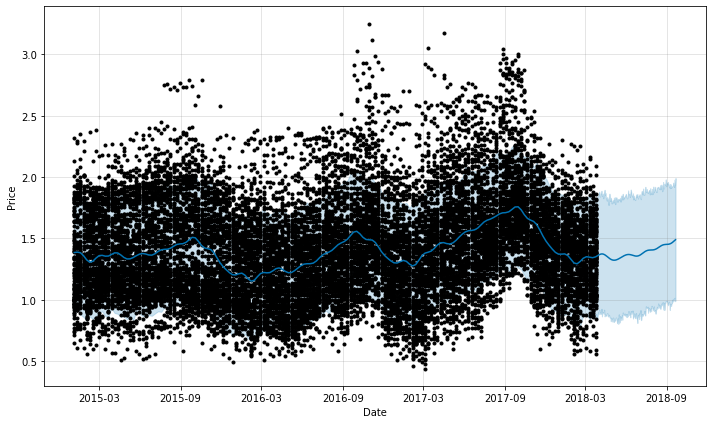

In [28]:
# plot the predicted future price
plot=pro.plot(future_price, xlabel='Date', ylabel='Price')

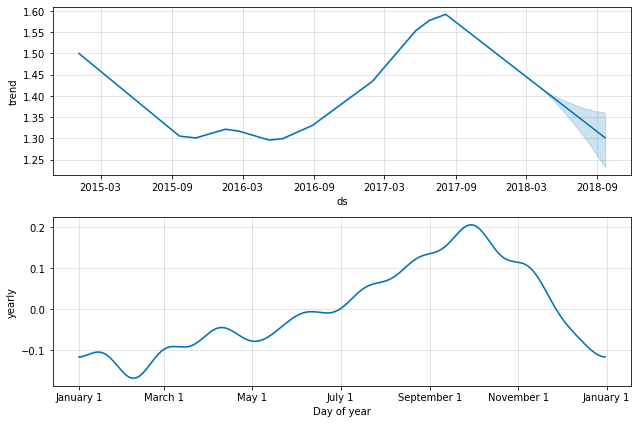

In [29]:
plot2=pro.plot_components(future_price)

### create function to predict general avocado price for different type (not considering region)

In [47]:
def price_prediction_type(type):
    df=data[data['type']==type].dropna().sort_values('Date')
    df.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
    pro=Prophet()
    pro.fit(df)
    future=pro.make_future_dataframe(periods=180)
    future_price=pro.predict(future)
    plot=pro.plot(future_price, xlabel='Date', ylabel='Price')
    plot2=pro.plot_components(future_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


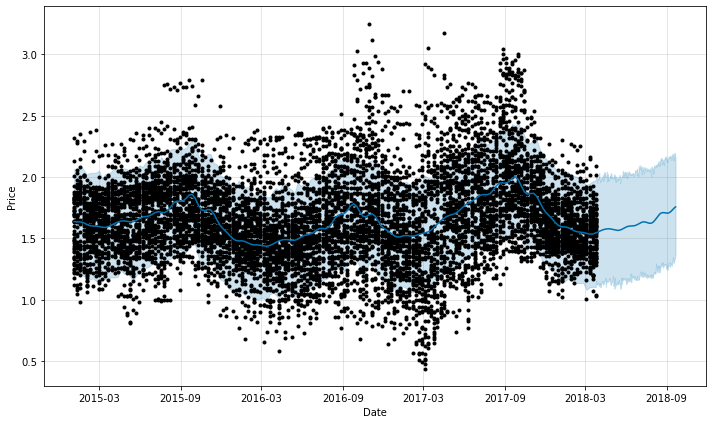

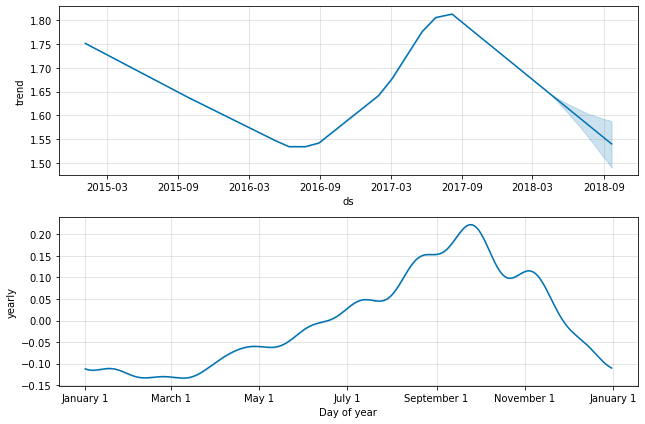

In [48]:
price_prediction_type('organic')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


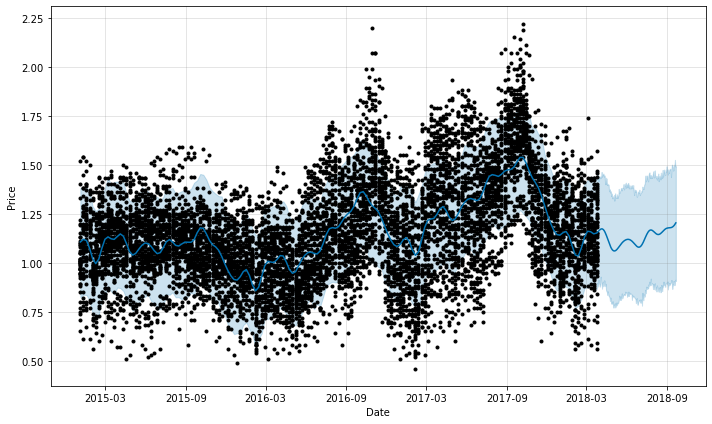

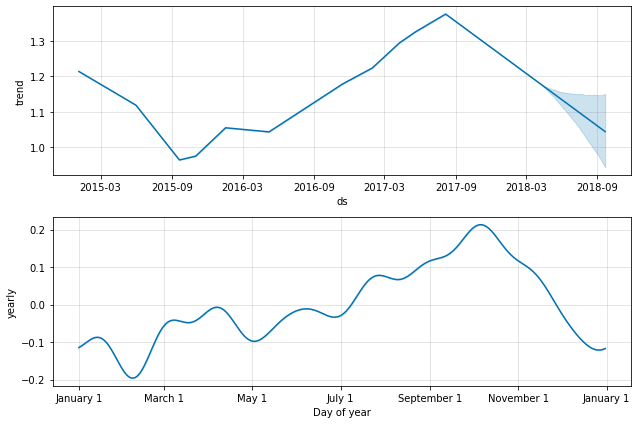

In [49]:
price_prediction_type('conventional') ## more price fluctuation for conventional

### create function to predict avocado price for specific region

In [39]:
def price_prediction_region(region):
    df=data[data['region']==region].dropna().sort_values('Date')
    df.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
    pro=Prophet()
    pro.fit(df)
    future=pro.make_future_dataframe(periods=180)
    future_price=pro.predict(future)
    plot=pro.plot(future_price, xlabel='Date', ylabel='Price')
    plot2=pro.plot_components(future_price)
 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


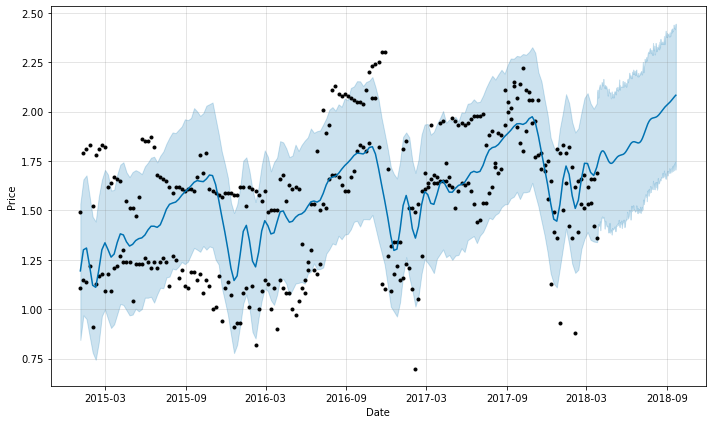

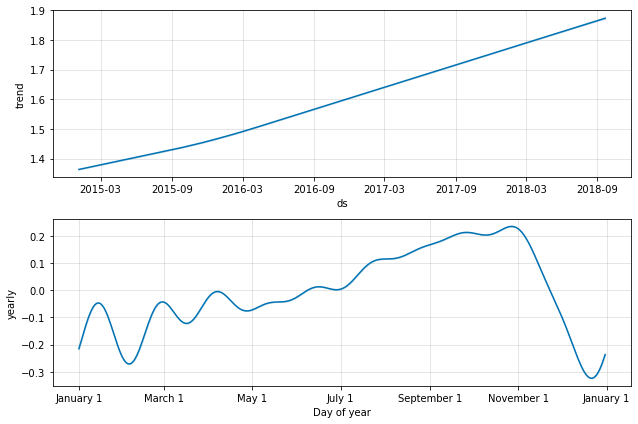

In [40]:
# check price in chicago
price_prediction_region('Chicago')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


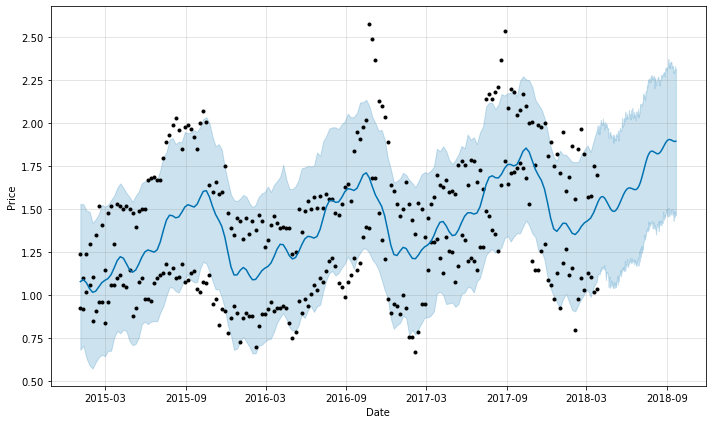

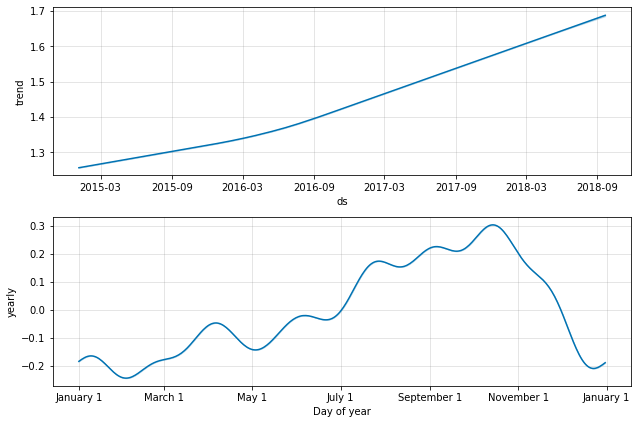

In [43]:
price_prediction_region('California')

#### Although avacado price in two regions have the general increasing trend, they have the different seasonality.

### Create the function to predict different region and different type avocado price


In [50]:
def price_prediction(region, type):
    df=data[(data['region']==region) & (data['type']==type)].dropna().sort_values('Date')
    df.rename(columns={'Date':'ds', 'AveragePrice':'y'}, inplace=True)
    pro=Prophet()
    pro.fit(df)
    future=pro.make_future_dataframe(periods=180)
    future_price=pro.predict(future)
    plot=pro.plot(future_price, xlabel='Date', ylabel='Price')
    plot2=pro.plot_components(future_price)
 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


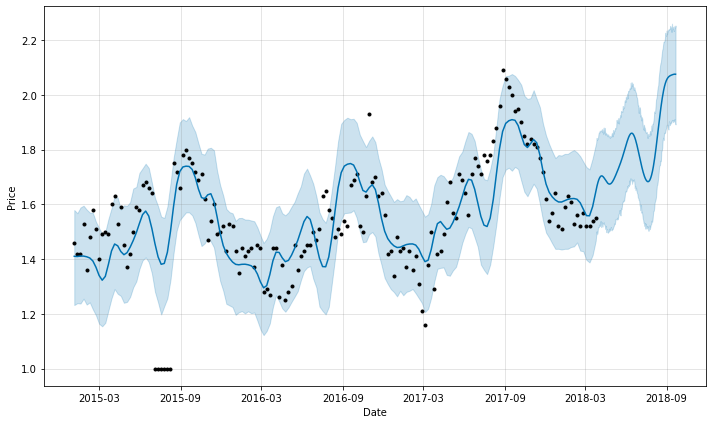

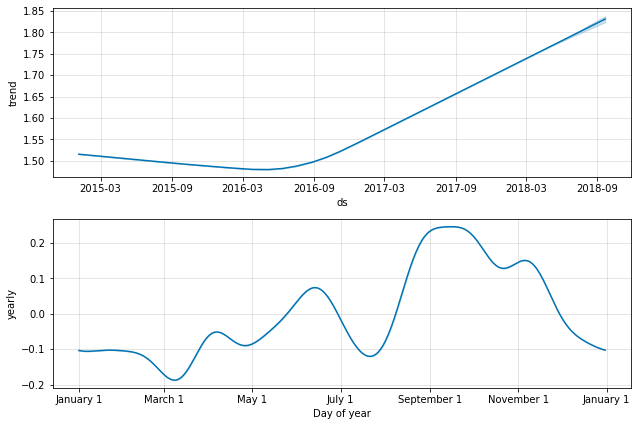

In [51]:
price_prediction('TotalUS', 'organic')